### AQ-10 methods scores

In [1]:
#Import python modules 

import numpy as np
import pandas as pd

#Visualisation
import matplotlib.pyplot as plt
import missingno
import seaborn as sns

#Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.preprocessing import LabelEncoder

# I: Adult Autism Dataset 

In [2]:
#load the adult autism dataset
df_adult = pd.read_csv("Autism_Data.arff")
df_adult = df_adult.replace('?', np.nan)

In [3]:
#column name spell check/ fixes 
df_adult = df_adult.rename(columns = {"A1_Score":"A1","A2_Score":"A2",'A3_Score':'A3', 'A4_Score':'A4', 
                                      'A5_Score':'A5', 'A6_Score':'A6','A7_Score':'A7', 'A8_Score':'A8', 
                                      'A9_Score':'A9', 'A10_Score':'A10', "jundice":"jaundice", "austim":"autism",
                                      "contry_of_res": "country", "Class/ASD":"Class_ASD"})

In [4]:
df_adult.head() #Check README to see the questions. 

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,gender,ethnicity,jaundice,autism,country,used_app_before,result,age_desc,relation,Class_ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2,'18 and more',NaN,NO


<AxesSubplot:>

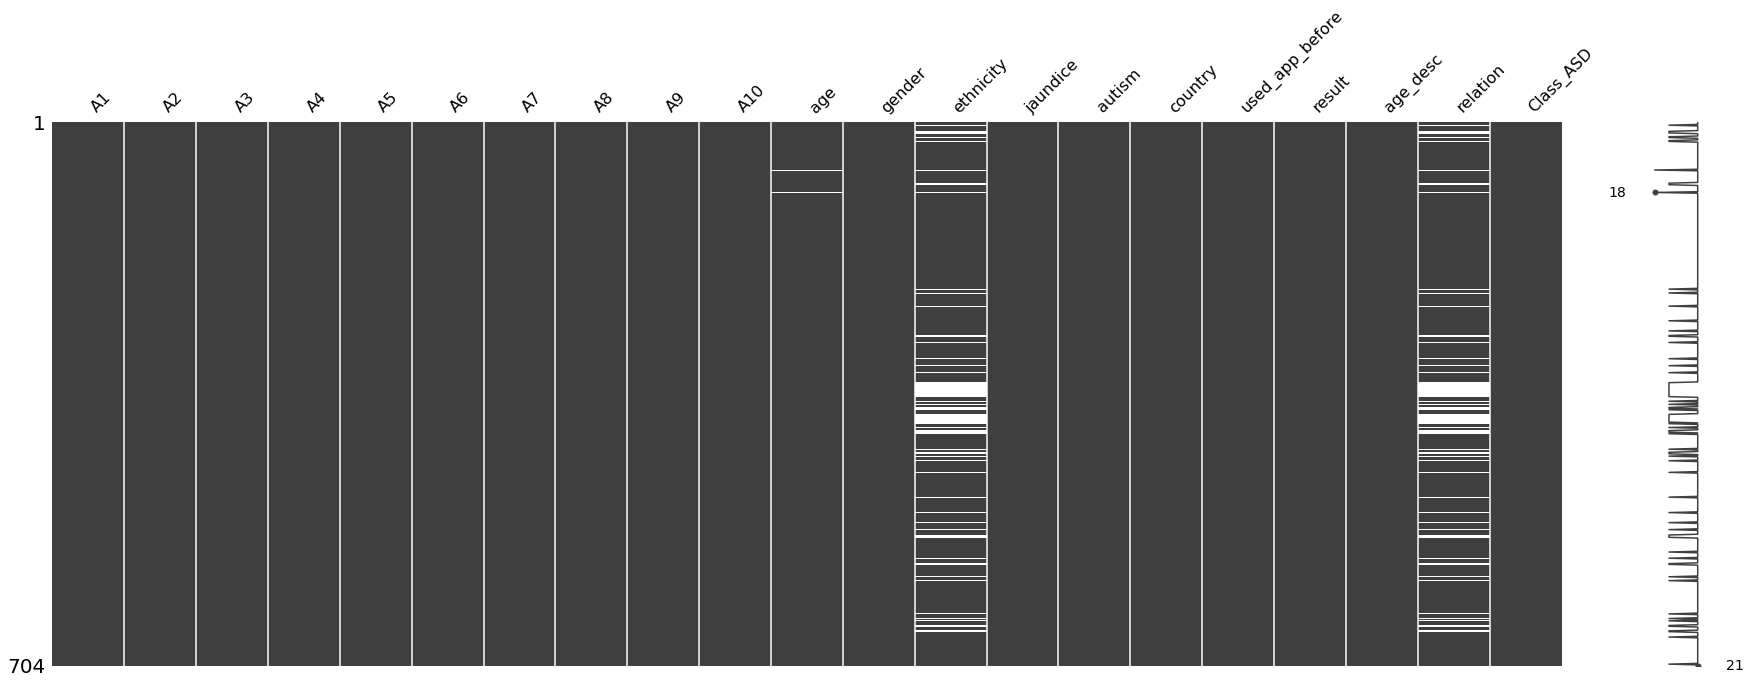

In [5]:
#Missing data
missingno.matrix(df_adult, figsize =(30,10))

In [6]:
df_adult.dtypes

A1                  int64
A2                  int64
A3                  int64
A4                  int64
A5                  int64
A6                  int64
A7                  int64
A8                  int64
A9                  int64
A10                 int64
age                object
gender             object
ethnicity          object
jaundice           object
autism             object
country            object
used_app_before    object
result              int64
age_desc           object
relation           object
Class_ASD          object
dtype: object

In [7]:
df_adult.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


### Age Composition

In [8]:
df_adult.age

0      26
1      24
2      27
3      35
4      40
       ..
699    25
700    34
701    24
702    35
703    26
Name: age, Length: 704, dtype: object

<AxesSubplot:xlabel='age', ylabel='count'>

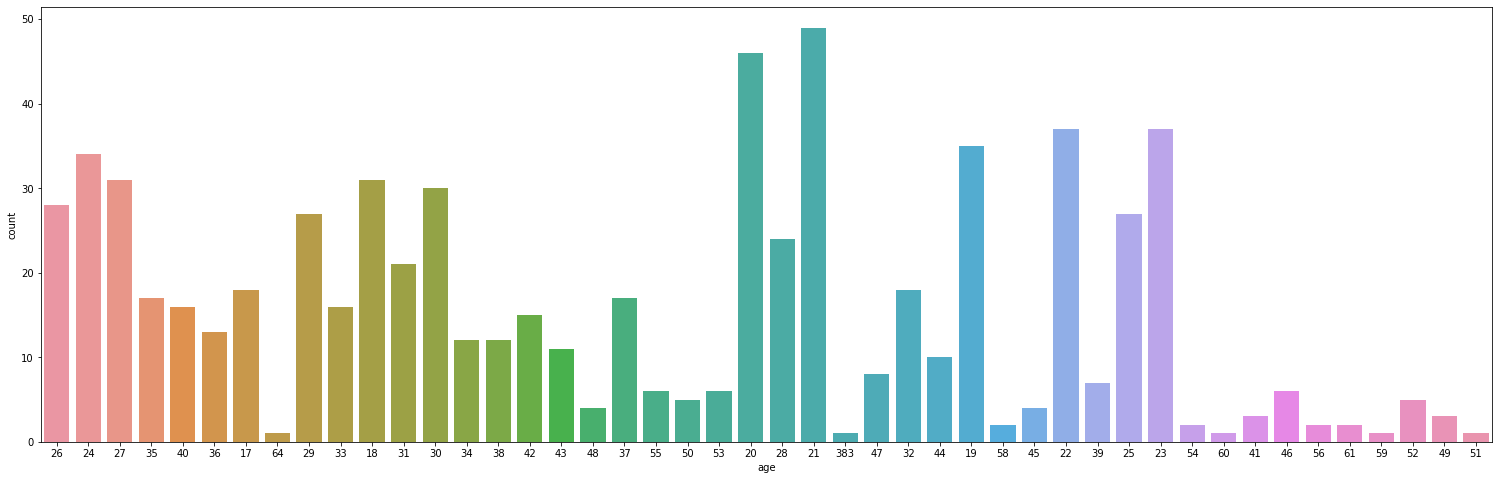

In [9]:
fig = plt.figure(figsize=(26,8))
sns.countplot(x="age", data=df_adult)

In [10]:
#Check how many NaN values exist
df_adult['age'].isnull().sum()

2

Removing the two rows that don't have the age values

In [11]:
df_adult.dropna(subset = ["age"], inplace=True)

In [12]:
df_adult['age'].max()
mean = df_adult['age'].mean()
df_adult['age']= df_adult['age'].replace(383.0 ,mean)

### Country

Country of residence of the participants. Maximum participants are from United States, UAE, India, New Zealand and the UK. 

'United States'           113
'United Arab Emirates'     82
'New Zealand'              81
India                      81
'United Kingdom'           77
                         ... 
'Hong Kong'                 1
Azerbaijan                  1
Iraq                        1
Burundi                     1
'Sierra Leone'              1
Name: country, Length: 67, dtype: int64

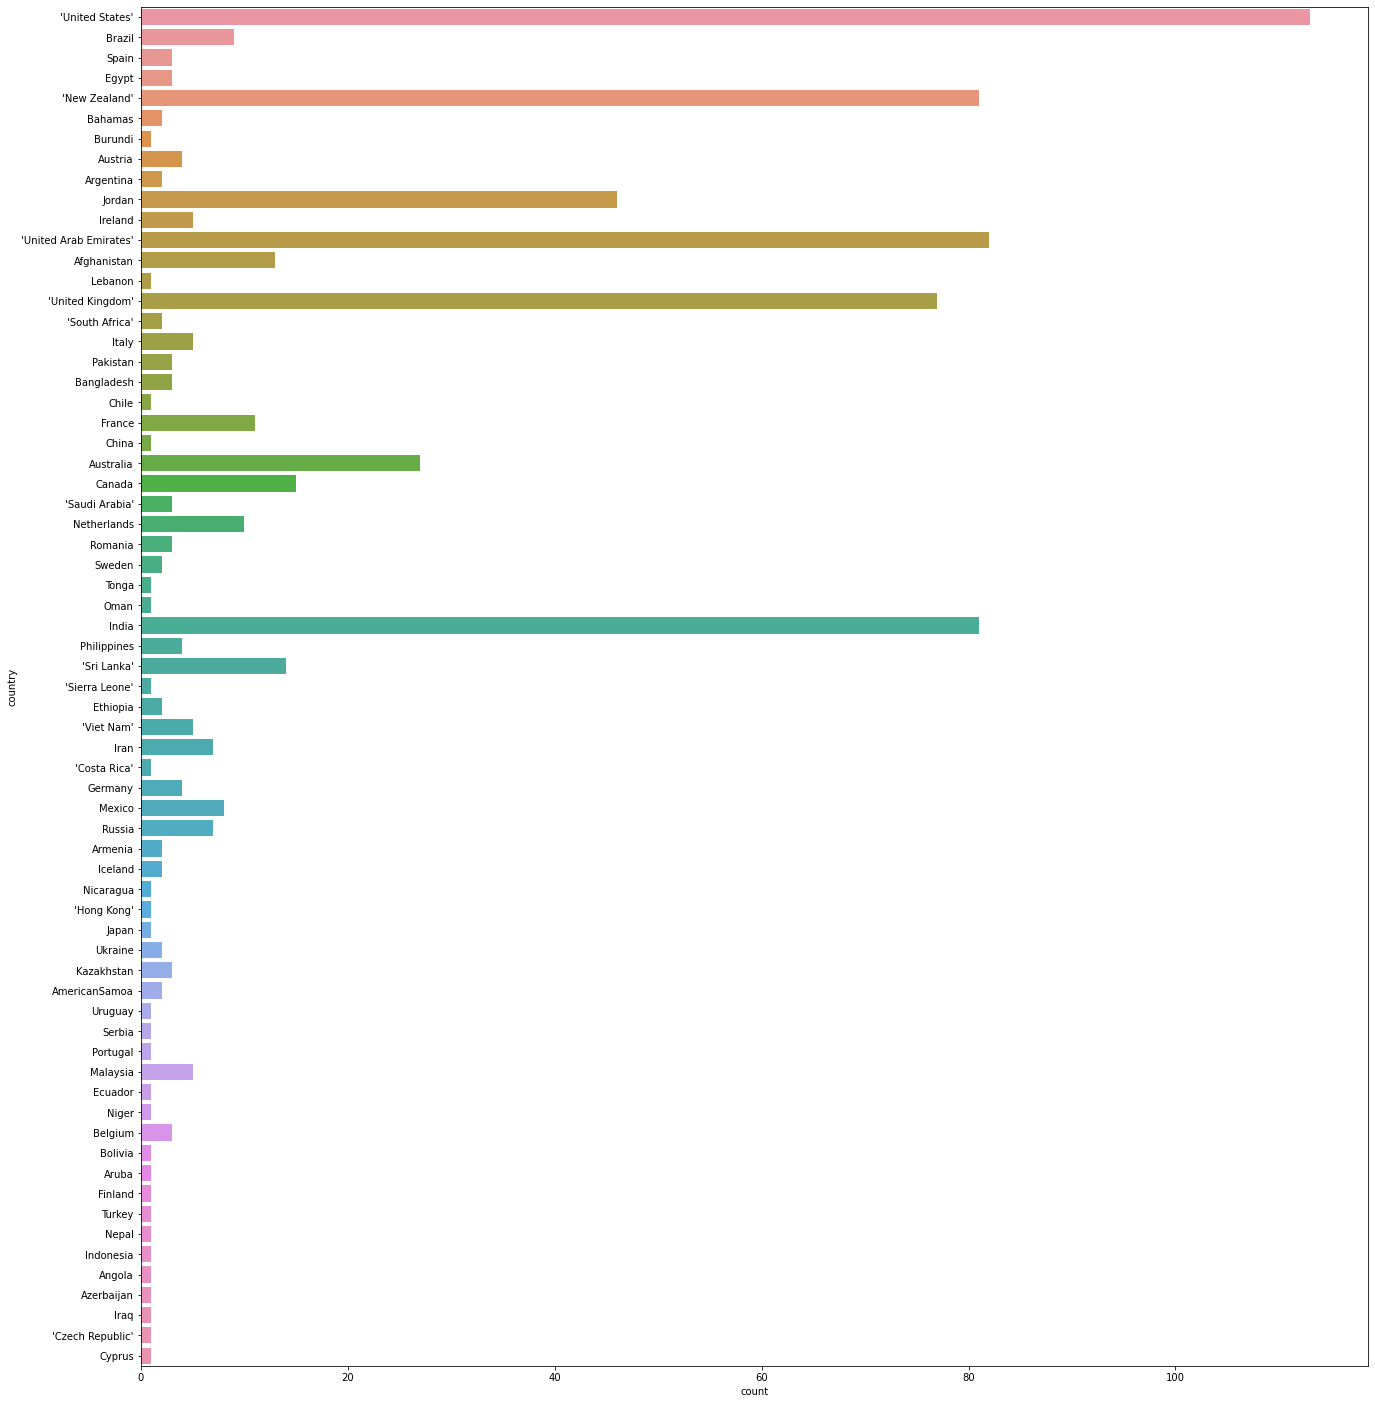

In [13]:
fig = plt.figure(figsize=(22,25))
sns.countplot(y='country', data=df_adult);
df_adult.country.value_counts()

### Gender distribution

<AxesSubplot:xlabel='gender', ylabel='count'>

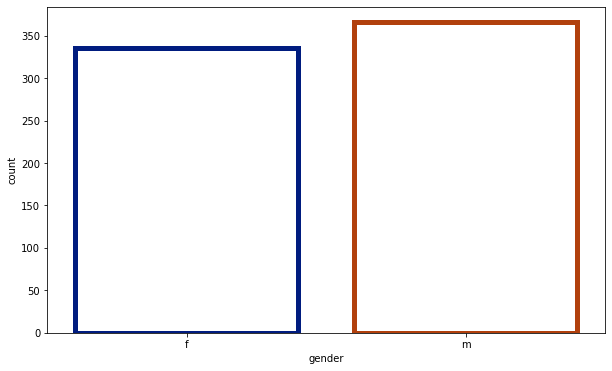

In [14]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="gender", data=df_adult, facecolor=(0, 0, 0, 0), linewidth=5, edgecolor=sns.color_palette("dark", 3))

If the user is male, m( = 0);
If the user is female (= 1).
According to the dataset, 367 male and 337 female persons with ASD participated.

### Users without Jaundice during birth

The bar shows how the ASD cases are divided into jaundice at birth cases

If the user was born with jaundice then, yes( = 1);
If the user wasn't born with jaundice then, no (= 0).
According to the dataset, 69 individuals were born with jaundice out of 704.

no     633
yes     69
Name: jaundice, dtype: int64

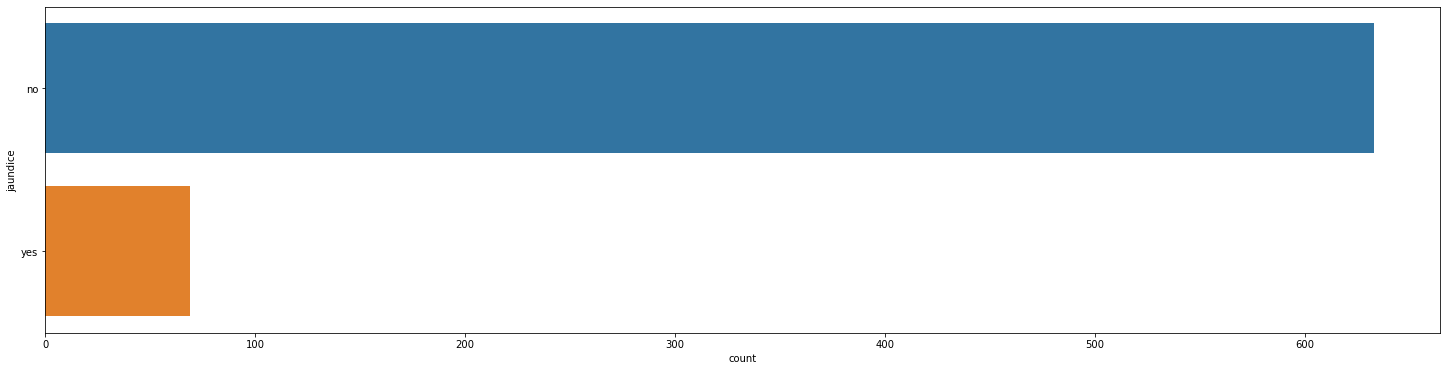

In [15]:
fig = plt.figure(figsize=(25,6))
sns.countplot(y='jaundice', data=df_adult);
df_adult.jaundice.value_counts()

### Autism

If the user has an immediate family member who had a Pervasive Developmental Disorder then, yes( = 1);
If the user has an immediate family member who had  Pervasive Developmental Disorder then, no( = 0);
According to the dataset, 91 individuals had a family member who had PDD out of 704.

In [16]:
new_df= pd.DataFrame({'autism':df_adult.autism.map(dict(yes=1,no=0))})
df_adult.update(new_df)

In [17]:
df_adult['autism'] = df_adult['autism'].astype('int')

0    611
1     91
Name: autism, dtype: int64

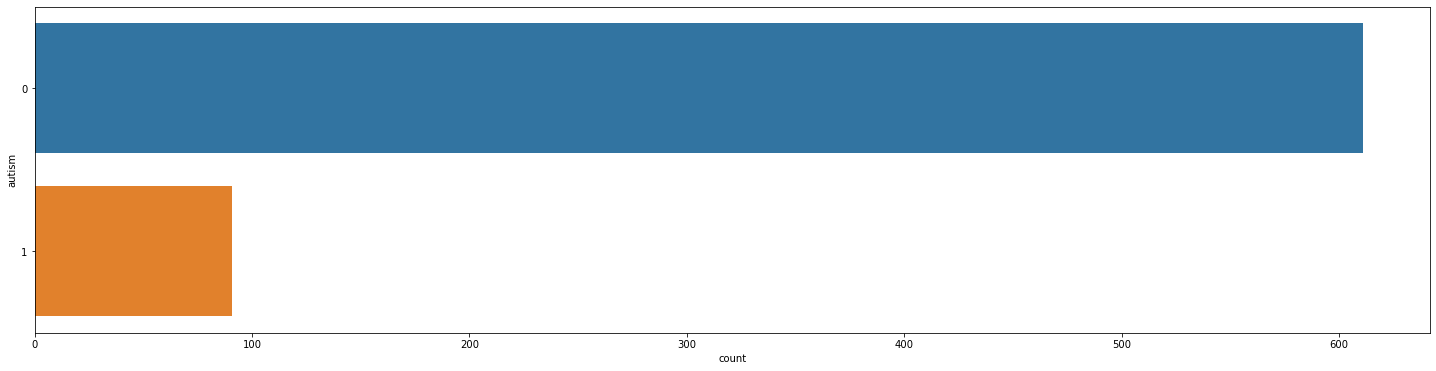

In [18]:
fig = plt.figure(figsize=(25,6))
sns.countplot(y='autism', data=df_adult);
df_adult.autism.value_counts()

### ASD Classification

In [19]:
df_adult.head(1)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,gender,ethnicity,jaundice,autism,country,used_app_before,result,age_desc,relation,Class_ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,0,'United States',no,6,'18 and more',Self,NO


In [20]:
new_df = pd.DataFrame({'Class_ASD':df_adult.Class_ASD.map(dict(YES=1,NO=0))})
df_adult.update(new_df)

In [21]:
df_adult['Class_ASD'] = df_adult['Class_ASD'].astype('int')

0    513
1    189
Name: Class_ASD, dtype: int64

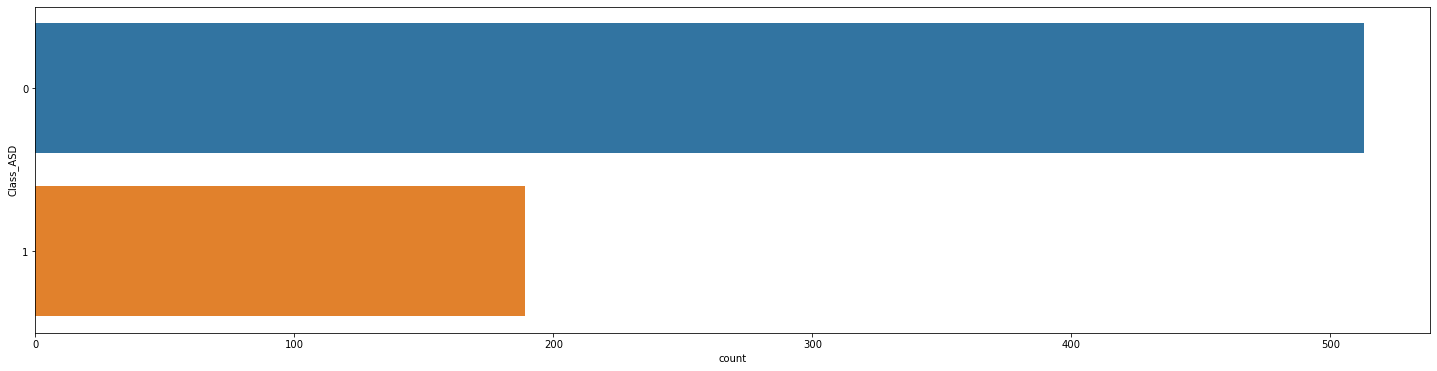

In [22]:
fig = plt.figure(figsize=(25,6))
sns.countplot(y='Class_ASD', data=df_adult);
df_adult.Class_ASD.value_counts()

### Used App Before

Whether the p/w ASD has used a screening app

In [23]:
new_df = pd.DataFrame({'used_app_before':df_adult.used_app_before.map(dict(yes=1,no=0))})
df_adult.update(new_df)

In [24]:
df_adult['used_app_before'] = df_adult['used_app_before'].astype('int')

0    690
1     12
Name: used_app_before, dtype: int64

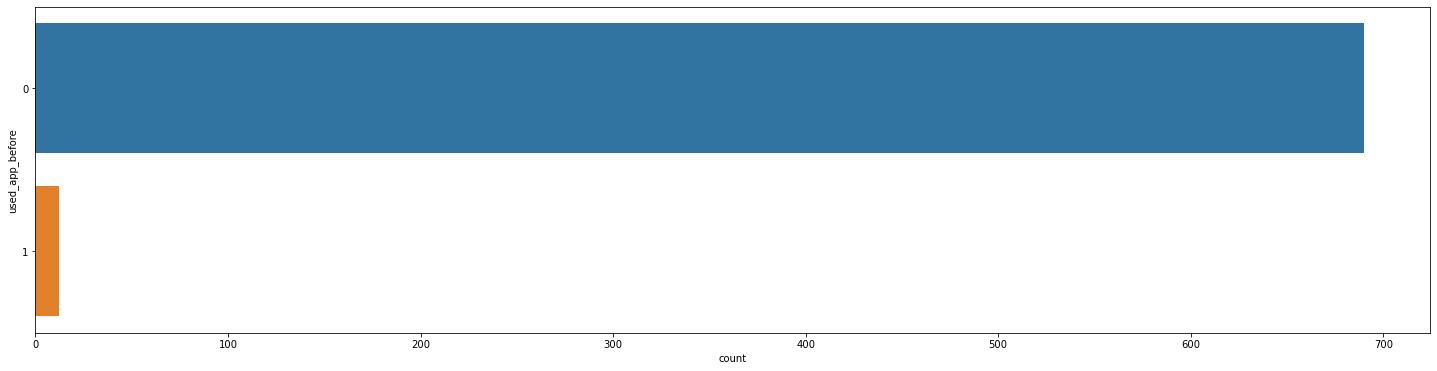

In [25]:
fig = plt.figure(figsize=(25,6))
sns.countplot(y='used_app_before', data=df_adult);
df_adult.used_app_before.value_counts()

In [26]:
df_adult.age_desc.value_counts()

'18 and more'    702
Name: age_desc, dtype: int64

### Problem Columns: Ethnicity and Relation Cols

White-European       233
Asian                123
'Middle Eastern '     92
Black                 43
'South Asian'         36
Others                30
Latino                20
Hispanic              13
Pasifika              12
Turkish                6
others                 1
Name: ethnicity, dtype: int64

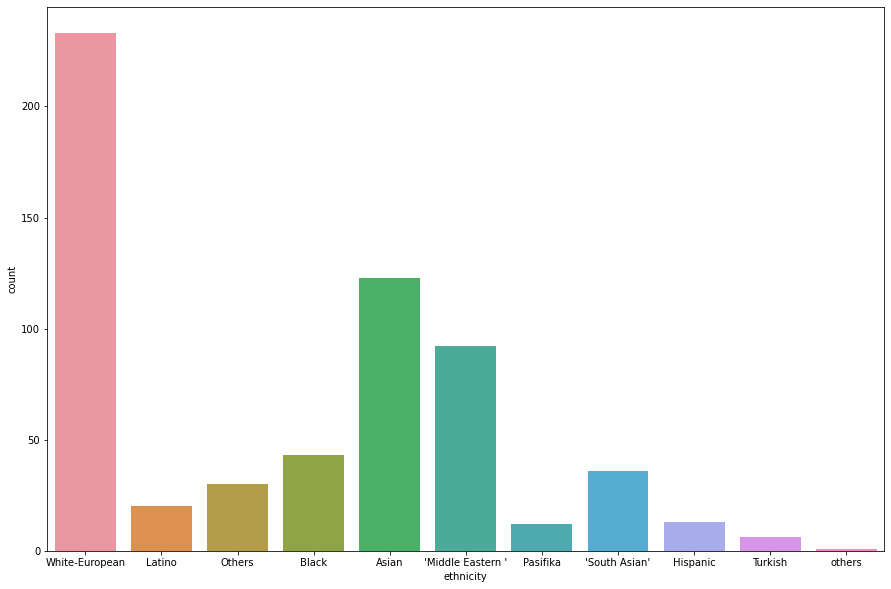

In [27]:
plt.figure(figsize =(15,10))
sns.countplot(x= 'ethnicity',data = df_adult)
df_adult['ethnicity'].value_counts()

Self                          522
Parent                         50
Relative                       28
Others                          5
'Health care professional'      4
Name: relation, dtype: int64

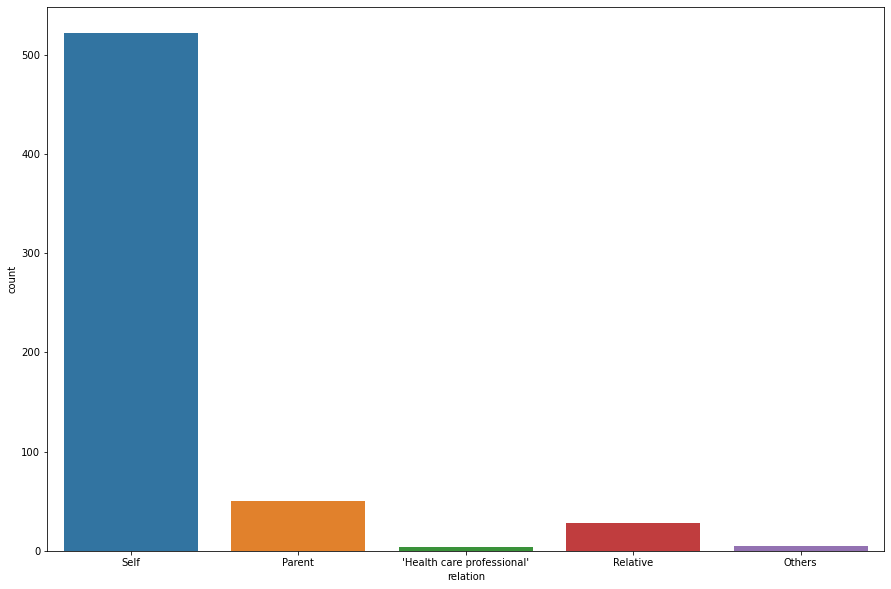

In [28]:
plt.figure(figsize =(15,10))
sns.countplot(x= 'relation', data = df_adult)
df_adult['relation'].value_counts()

In [29]:
df_adult.dtypes

A1                  int64
A2                  int64
A3                  int64
A4                  int64
A5                  int64
A6                  int64
A7                  int64
A8                  int64
A9                  int64
A10                 int64
age                object
gender             object
ethnicity          object
jaundice           object
autism              int64
country            object
used_app_before     int64
result              int64
age_desc           object
relation           object
Class_ASD           int64
dtype: object

In [30]:
df_adult.dtypes

A1                  int64
A2                  int64
A3                  int64
A4                  int64
A5                  int64
A6                  int64
A7                  int64
A8                  int64
A9                  int64
A10                 int64
age                object
gender             object
ethnicity          object
jaundice           object
autism              int64
country            object
used_app_before     int64
result              int64
age_desc           object
relation           object
Class_ASD           int64
dtype: object

In [31]:
df_adult.drop(['country', 'ethnicity', 'used_app_before' , 'age','age_desc','relation', 'result'],axis=1, inplace=True)
df_adult 
# Dropped age (since its not an indicator whether an individual has ASD). 
# Incomplete data on Ethinicity, Relation (Check missing data plot)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,gender,jaundice,autism,Class_ASD
0,1,1,1,1,0,0,1,1,0,0,f,no,0,0
1,1,1,0,1,0,0,0,1,0,1,m,no,1,0
2,1,1,0,1,1,0,1,1,1,1,m,yes,1,1
3,1,1,0,1,0,0,1,1,0,1,f,no,1,0
4,1,0,0,0,0,0,0,1,0,0,f,no,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,f,no,0,1
700,1,0,0,0,0,0,0,1,0,1,m,no,0,0
701,1,0,1,1,1,0,1,1,0,1,f,no,0,1
702,1,0,0,1,1,0,1,0,1,1,m,no,0,0


<AxesSubplot:>

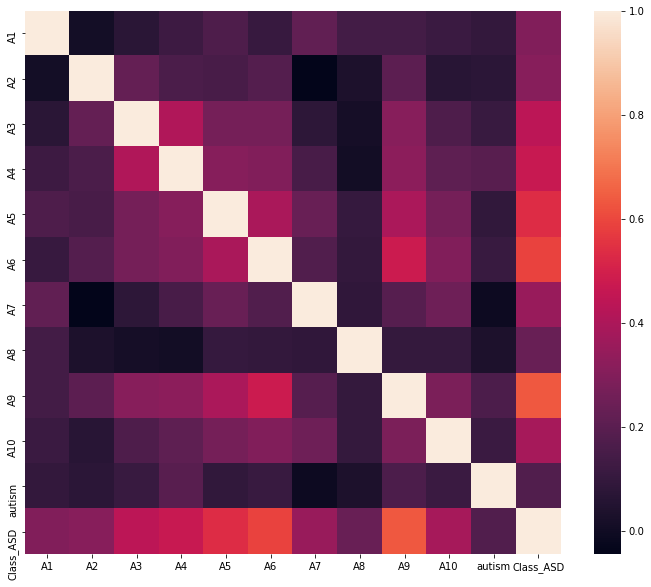

In [32]:
fig = plt.figure(figsize=(12,10))
sns.heatmap(df_adult.corr())

# II: Toddler Dataset

In [33]:
#load the toddler autism dataset
df_toddler = pd.read_csv("Autism_Dataset.csv")

<AxesSubplot:>

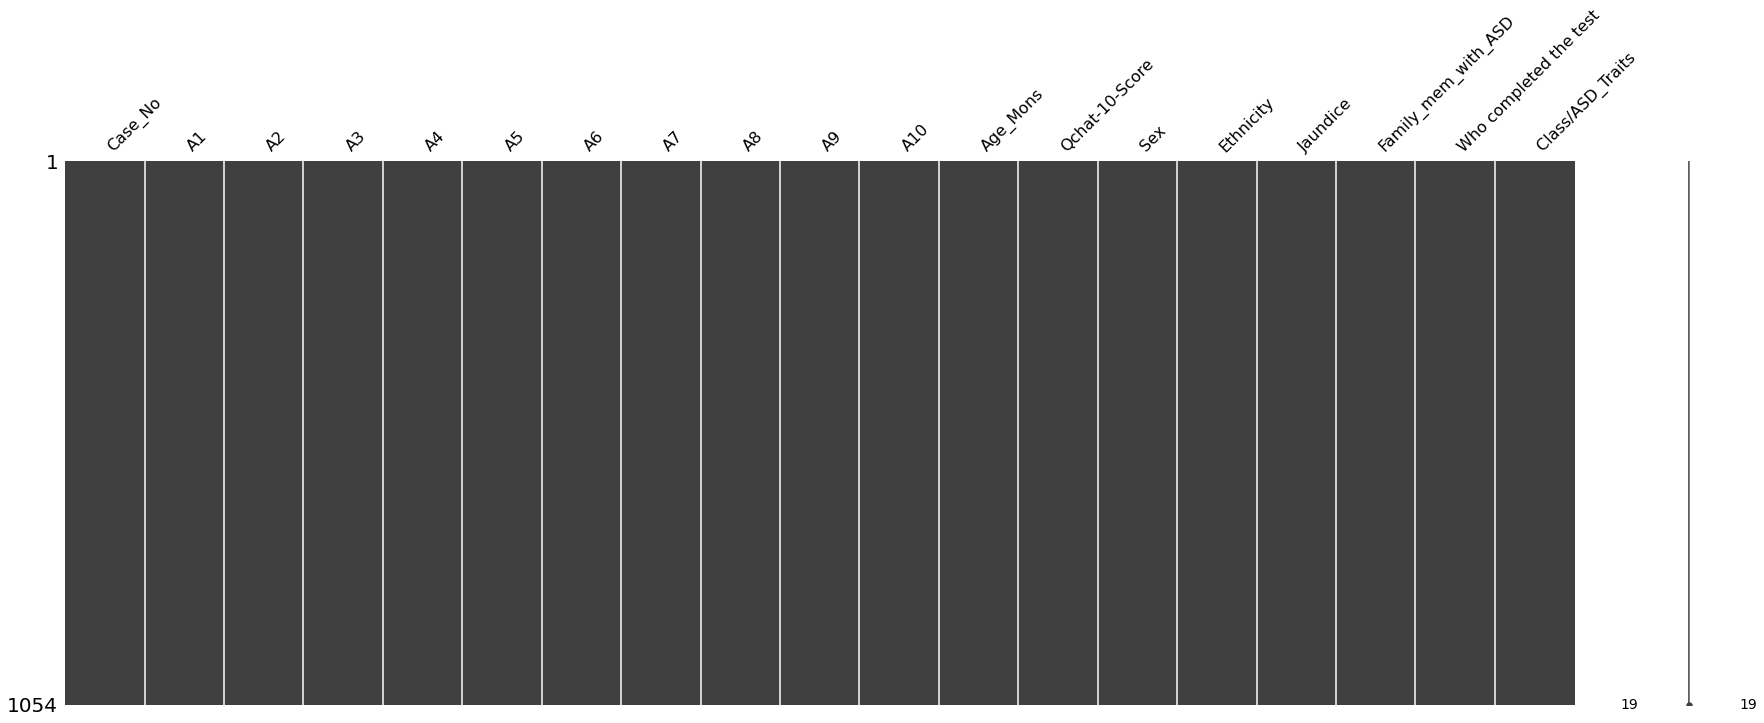

In [34]:
missingno.matrix(df_toddler, figsize =(30,10))

<AxesSubplot:>

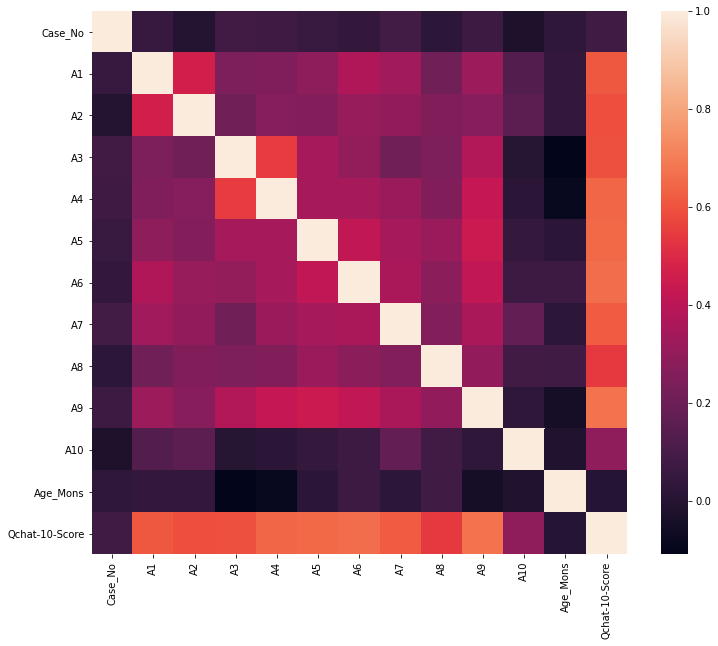

In [35]:
fig = plt.figure(figsize=(12,10))
sns.heatmap(df_toddler.corr())

# Comparing the two datasets

In [36]:
df_toddler.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD_Traits '],
      dtype='object')

# Merging the datasets

In [37]:
#def one_hot_encoder():
#    return 

In [38]:

le = LabelEncoder()
#df_toddler.gender = le.fit_transform(df_toddler.gender)
#df_toddler.jaundice = le.fit_transform(df_toddler.jaundice)
df_toddler

#column name spell check/ fixes 
df_toddler = df_toddler.rename(columns = {"Jaundice":"jaundice", "Qchat-10-Score":"result", "austim":"autism",
                                      "Class/ASD_Traits":"Class_ASD"})
df_toddler.drop(['Ethnicity', 'Age_Mons','Family_mem_with_ASD', "Who completed the test", 'result'],axis=1, inplace=True)


,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,result,Sex,Ethnicity,jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD_Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No


In [50]:
df_toddler.head(1)

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Sex,jaundice,Class/ASD_Traits
0,1,0,0,0,0,0,0,1,1,0,1,f,yes,No


In [51]:
df_adult.head(1)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,gender,jaundice,autism,Class_ASD
0,1,1,1,1,1,0,1,1,1,1,1,1,0,1


In [40]:
le = LabelEncoder()
df_adult.gender = le.fit_transform(df_adult.gender)
df_adult.jaundice = le.fit_transform(df_adult.jaundice)
df_adult

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,gender,jaundice,autism,Class_ASD
0,1,1,1,1,0,0,1,1,0,0,0,0,0,0
1,1,1,0,1,0,0,0,1,0,1,1,0,1,0
2,1,1,0,1,1,0,1,1,1,1,1,1,1,1
3,1,1,0,1,0,0,1,1,0,1,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,0,0,0,1
700,1,0,0,0,0,0,0,1,0,1,1,0,0,0
701,1,0,1,1,1,0,1,1,0,1,0,0,0,1
702,1,0,0,1,1,0,1,0,1,1,1,0,0,0


# Split into train/test

In [41]:
# split into train/test 
def train_test_split(df, train_frac= 0.7, seed=1):
    df_matrix = df_adult.values
    
    # shuffle the data
    np.random.seed(seed)
    np.random.shuffle(df_matrix)
    
    # split the data
    train_size = int(df_matrix.shape[0] * train_frac)
    # features are all except last column
    train_features  = df_matrix[:train_size, :-1]
    # the last column
    train_labels = df_matrix[:train_size, -1]

    # test data
    test_features = df_matrix[train_size:, :-1]
    test_labels = df_matrix[train_size:, -1]
    
    return (train_features, train_labels), (test_features, test_labels)

In [42]:
# get train/test data
(train_features, train_labels), (test_features, test_labels) = train_test_split(df_adult, train_frac=0.7)

In [43]:
#train the model
lg = LogisticRegression()

In [44]:
lg.fit(train_features, train_labels)
lgpredict = lg.predict(test_features)

In [45]:
lg.score(test_features, test_labels)

0.995260663507109

In [46]:
pred_lg = lg.predict(test_features)
log_reg_predict_proba = lg.predict_proba(test_features)[:, 1]

In [47]:
print('\nLogistic Regression Accuracy: {:.2f}%'.format(accuracy_score(test_labels, lgpredict) * 100))
print(classification_report(test_labels,pred_lg))


Logistic Regression Accuracy: 99.53%
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       157
           1       1.00      0.98      0.99        54

    accuracy                           1.00       211
   macro avg       1.00      0.99      0.99       211
weighted avg       1.00      1.00      1.00       211

